In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Silver_Data.csv')

In [4]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,06/09/2023,24.410,24.360,24.620,24.280,63.77K,0.25%
1,06/08/2023,24.348,23.525,24.460,23.510,84.07K,3.48%
2,06/07/2023,23.529,23.675,24.165,23.480,73.33K,-0.60%
3,06/06/2023,23.670,23.665,23.870,23.410,44.28K,0.15%
4,06/05/2023,23.635,23.690,23.785,23.320,47.49K,-0.47%
...,...,...,...,...,...,...,...
1409,12/07/2017,15.753,15.965,15.965,15.630,0.03K,-1.04%
1410,12/06/2017,15.918,16.090,16.095,15.940,0.03K,-0.71%
1411,12/05/2017,16.032,16.345,16.345,16.055,0.09K,-1.87%
1412,12/04/2017,16.338,16.338,16.338,16.338,0.00K,-0.10%


# PREPROCESSING DATA

In [5]:
df = df[['Price']]
# Flip the column
df = df.iloc[::-1]

# Drop missing values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)

# SPLITTING DATA(7-2-1)

In [6]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# LINEAR REGRESSION

In [7]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [8]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

In [9]:
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [10]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the  prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted Silver prices for the next 30 days
print('Predicted Silver prices for the next 30 days:')
print(y_next_30_days)

Predicted Silver prices for the next 30 days:
[30.82739729 30.84011695 30.8528366  30.86555626 30.87827592 30.89099558
 30.90371524 30.9164349  30.92915456 30.94187421 30.95459387 30.96731353
 30.98003319 30.99275285 31.00547251 31.01819217 31.03091182 31.04363148
 31.05635114 31.0690708  31.08179046 31.09451012 31.10722978 31.11994943
 31.13266909 31.14538875 31.15810841 31.17082807 31.18354773 31.19626739]


In [11]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  6.069492259929703
Testing MAE:  5.215405715476193
Testing MAPE:  25.42539727679879
Validation RMSE:  6.624648329923325
Validation MAE:  6.483924529659403
Validation MAPE:  28.11928408827431


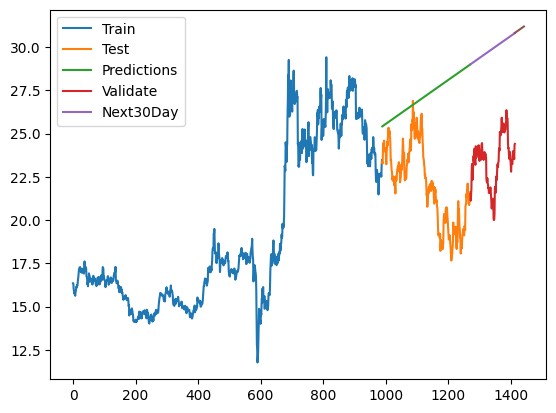

In [12]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [13]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1357.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          9.70e-209
Time:                        12:58:48   Log-Likelihood:                -3580.8
No. Observations:                1414   AIC:                             7166.
Df Residuals:                    1412   BIC:                             7176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9663      0.162     92.400      0.0

# SPLITTING DATA(6-3-1)

In [14]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [15]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted prices for the next 30 days
print('Predicted Silver prices for the next 30 days:')
print(y_next_30_days)

Predicted Silver prices for the next 30 days:
[29.82174138 29.83357856 29.84541574 29.85725292 29.86909009 29.88092727
 29.89276445 29.90460162 29.9164388  29.92827598 29.94011315 29.95195033
 29.96378751 29.97562468 29.98746186 29.99929904 30.01113621 30.02297339
 30.03481057 30.04664775 30.05848492 30.0703221  30.08215928 30.09399645
 30.10583363 30.11767081 30.12950798 30.14134516 30.15318234 30.16501951]


In [16]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)


test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  4.65245426514271
Testing MAE:  3.726680917066085
Testing MAPE:  17.53053704587585
Validation RMSE:  5.699115828489402
Validation MAE:  5.5349184492971295
Validation MAPE:  24.04254799368696


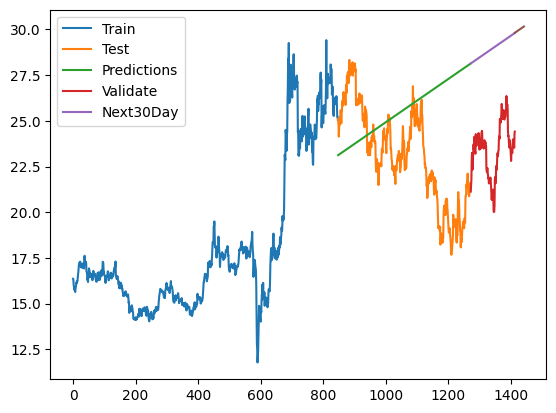

In [17]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [18]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1357.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          9.70e-209
Time:                        12:58:48   Log-Likelihood:                -3580.8
No. Observations:                1414   AIC:                             7166.
Df Residuals:                    1412   BIC:                             7176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9663      0.162     92.400      0.0

# SPLITTING DATA(5-3-2)

In [19]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [20]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the Silver prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted Silver prices for the next 30 days
print('Predicted Silver prices for the next 30 days:')
print(y_next_30_days)

Predicted Silver prices for the next 30 days:
[22.29415541 22.29949798 22.30484056 22.31018313 22.3155257  22.32086828
 22.32621085 22.33155343 22.336896   22.34223857 22.34758115 22.35292372
 22.35826629 22.36360887 22.36895144 22.37429402 22.37963659 22.38497916
 22.39032174 22.39566431 22.40100689 22.40634946 22.41169203 22.41703461
 22.42237718 22.42771975 22.43306233 22.4384049  22.44374748 22.44909005]


In [21]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  5.6044489109981654
Testing MAE:  5.240601712925855
Testing MAPE:  20.64929179639815
Validation RMSE:  1.8950584585012908
Validation MAE:  1.6112706645965205
Validation MAPE:  7.43427423366771


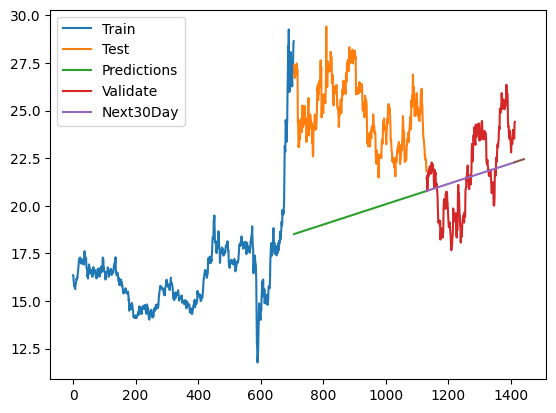

In [22]:
# Plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [23]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['Price'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1357.
Date:                Mon, 19 Jun 2023   Prob (F-statistic):          9.70e-209
Time:                        12:58:49   Log-Likelihood:                -3580.8
No. Observations:                1414   AIC:                             7166.
Df Residuals:                    1412   BIC:                             7176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9663      0.162     92.400      0.0

# EVALUATING MODEL

---
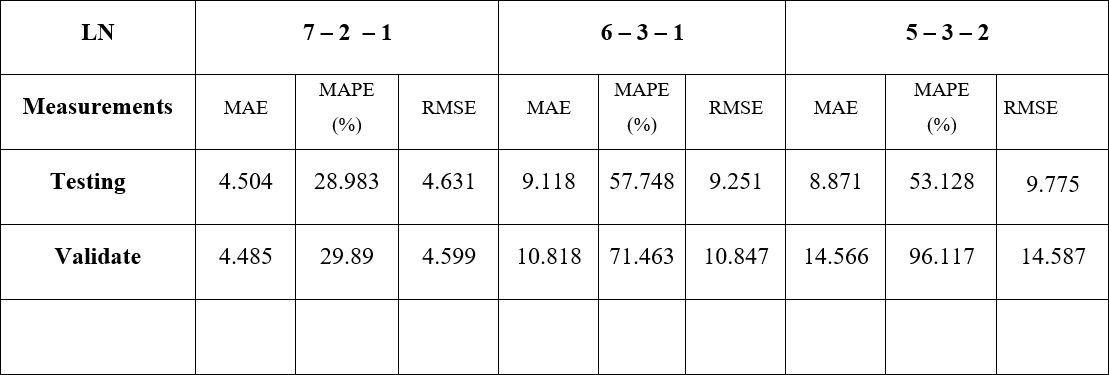